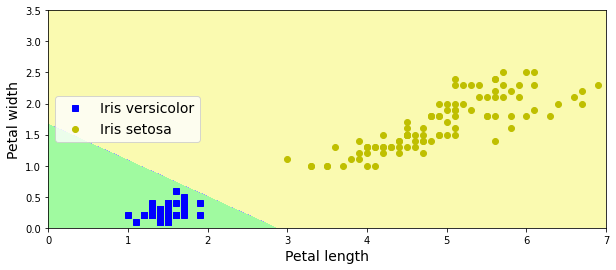

In [2]:
#Simple Perceptron
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris setosa?

per_clf = Perceptron()
#Fit here trains equivalently with SGDClassifier with loss="perceptron", learning_rate="constant", eta0=1, and penalty=None
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

#Visualizing Decision Boundaries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 1000).reshape(-1, 1),
    np.linspace(0, 3.5, 500).reshape(-1, 1), )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = per_clf.predict(X_new)

zz = y_predict.reshape(x0.shape) 

plt.figure(figsize=(10, 4))
# plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

custom_cmap = ListedColormap(
    ['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5]) 
plt.show()

In [1]:
#Using Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
print("Tensoflow Version: "+str(tf.__version__))
print("Keras Version: "+str(keras.__version__))

Tensoflow Version: 2.4.1
Keras Version: 2.4.0


In [9]:
#Fashionista Baby MNISsssssssT
fashion_mnist = keras.datasets.fashion_mnist
#Images come in as 28x28 integer arrays
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

#Split it up
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#Categories
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#Sequential API Model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
#OR
# model = keras.models.Sequential([
#         keras.layers.Flatten(input_shape=[28, 28]),
#         keras.layers.Dense(300, activation="relu"),
#         keras.layers.Dense(100, activation="relu"),
#         keras.layers.Dense(10, activation="softmax")
#     ])

print("Summary of Our Model:")
print(model.summary())

#Grabbing info about our layers
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

#Compile
model.compile(loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

Summary of Our Model:
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
#Train the Model
history = model.fit(X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4148 - accuracy: 0.8542 - val_loss: 0.3993 - val_accuracy: 0.8630
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3953 - accuracy: 0.8629 - val_loss: 0.4054 - val_accuracy: 0.8540
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3787 - accuracy: 0.8671 - val_loss: 0.3652 - val_accuracy: 0.8740
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3661 - accuracy: 0.8712 - val_loss: 0.3633 - val_accuracy: 0.8760
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3540 - accuracy: 0.8748 - val_loss: 0.3612 - val_accuracy: 0.8768
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3441 - accuracy: 0.8782 - val_loss: 0.3572 - val_accuracy: 0.8792
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3347 - accuracy: 0.8807 - val_loss: 0.3511 - val_accuracy:

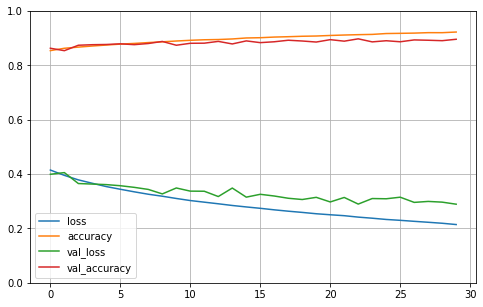

313/313 [==============================] - 1s 1ms/step - loss: 66.6382 - accuracy: 0.8472
[66.63819122314453, 0.8471999764442444]


In [13]:
#Plot the History!
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print(model.evaluate(X_test, y_test))

In [15]:
#Predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
#Model for Regression (Housing)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
    ])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.3142 - val_loss: 0.5754
Epoch 2/20
363/363 [==============================] - 0s 834us/step - loss: 0.5316 - val_loss: 0.4914
Epoch 3/20
363/363 [==============================] - 0s 784us/step - loss: 0.4429 - val_loss: 0.4745
Epoch 4/20
363/363 [==============================] - 0s 795us/step - loss: 0.4284 - val_loss: 0.4605
Epoch 5/20
363/363 [==============================] - 0s 746us/step - loss: 0.4234 - val_loss: 0.4703
Epoch 6/20
363/363 [==============================] - 0s 757us/step - loss: 0.4176 - val_loss: 0.4494
Epoch 7/20
363/363 [==============================] - 0s 904us/step - loss: 0.3898 - val_loss: 0.4387
Epoch 8/20
363/363 [==============================] - 0s 757us/step - loss: 0.4046 - val_loss: 0.4357
Epoch 9/20
363/363 [==============================] - 0s 806us/step - loss: 0.3974 - val_loss: 0.4312
Epoch 10/20
363/363 [==============================] - 0s 798us/step - loss: 0.4006 

In [23]:
#A More Complex Model (reference only)
# input_ = keras.layers.Input(shape=X_train.shape[1:])
# hidden1 = keras.layers.Dense(30, activation="relu")(input_)
# hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# concat = keras.layers.Concatenate()([input_, hidden2])
# output = keras.layers.Dense(1)(concat)
# model = keras.Model(inputs=[input_], outputs=[output])

# model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
# X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
# X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
# X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
#     validation_data=((X_valid_A, X_valid_B), y_valid))
# mse_test = model.evaluate((X_test_A, X_test_B), y_test)
# y_pred = model.predict((X_new_A, X_new_B))

In [20]:
# Multilpe inputs (California Housing)
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 4.3216 - val_loss: 1.1020
Epoch 2/20
363/363 [==============================] - 0s 999us/step - loss: 1.0026 - val_loss: 0.7549
Epoch 3/20
363/363 [==============================] - 0s 930us/step - loss: 0.7384 - val_loss: 0.6689
Epoch 4/20
363/363 [==============================] - 0s 986us/step - loss: 0.6698 - val_loss: 0.6270
Epoch 5/20
363/363 [==============================] - 0s 876us/step - loss: 0.6348 - val_loss: 0.5979
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6095 - val_loss: 0.5770
Epoch 7/20
363/363 [==============================] - 0s 909us/step - loss: 0.6154 - val_loss: 0.5589
Epoch 8/20
363/363 [==============================] - 0s 962us/step - loss: 0.5908 - val_loss: 0.5430
Epoch 9/20
363/363 [==============================] - 0s 962us/step - loss: 0.5659 - val_loss: 0.5338
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5495 - va

In [26]:
#Even more options
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

#Multiple losses
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")


X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

#Now tih labels
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.7068 - val_loss: 0.4693
Epoch 2/20
363/363 [==============================] - 0s 870us/step - loss: 0.5444 - val_loss: 0.4307
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4489 - val_loss: 0.4176
Epoch 4/20
363/363 [==============================] - 0s 918us/step - loss: 0.4370 - val_loss: 0.3969
Epoch 5/20
363/363 [==============================] - 0s 990us/step - loss: 0.4203 - val_loss: 0.3910
Epoch 6/20
363/363 [==============================] - 0s 901us/step - loss: 0.4165 - val_loss: 0.3808
Epoch 7/20
363/363 [==============================] - 0s 989us/step - loss: 0.4142 - val_loss: 0.3712
Epoch 8/20
363/363 [==============================] - 0s 846us/step - loss: 0.4082 - val_loss: 0.3693
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3766 - val_loss: 0.3655
Epoch 10/20
363/363 [==============================] - 0s 826us/step - loss: 0.3796 - va

TypeError: cannot unpack non-iterable float object

In [38]:
#Loopage and Conditionals with the Subclassing API
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    #Do anything you want in here (the call function)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()
model.call([keras.layers.Input(shape=[5], name="wide_input"),      
    keras.layers.Input(shape=[6], name="deep_input")])

(<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_84')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_85')>)

In [39]:
#Setting up MNIST again to save and load a model
fashion_mnist = keras.datasets.fashion_mnist
#Images come in as 28x28 integer arrays
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

#Split it up
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#Categories
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ]) # or keras.Model([...])
model.compile(loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])
model.fit(X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid))
model.save("my_keras_model.h5")

model_reborn = keras.models.load_model("my_keras_model.h5")

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9771 - accuracy: 0.6920 - val_loss: 0.5615 - val_accuracy: 0.8062
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5086 - accuracy: 0.8246 - val_loss: 0.4879 - val_accuracy: 0.8224
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4526 - accuracy: 0.8397 - val_loss: 0.4221 - val_accuracy: 0.8588
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4318 - accuracy: 0.8484 - val_loss: 0.4030 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4039 - accuracy: 0.8575 - val_loss: 0.3838 - val_accuracy: 0.8638
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3844 - accuracy: 0.8644 - val_loss: 0.3684 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3696 - accuracy: 0.8685 - val_loss: 0.3661 - val_accuracy:

In [40]:
#Callbacks (doing stuff at the beginning and end of each epoch)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2213 - accuracy: 0.9198
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2189 - accuracy: 0.9212
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2139 - accuracy: 0.9238
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2113 - accuracy: 0.9239
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2078 - accuracy: 0.9237
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2036 - accuracy: 0.9269
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2015 - accuracy: 0.9279
Epoch 8/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1985 - accuracy: 0.9291
Epoch 9/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1941 - accuracy: 0.9305
Epoch 10/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.190

In [41]:
#Early stopping with callbacks
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
    save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to best model

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1883 - accuracy: 0.9324 - val_loss: 0.2863 - val_accuracy: 0.8942
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1858 - accuracy: 0.9330 - val_loss: 0.3063 - val_accuracy: 0.8926
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1829 - accuracy: 0.9343 - val_loss: 0.3021 - val_accuracy: 0.8922
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1797 - accuracy: 0.9359 - val_loss: 0.3303 - val_accuracy: 0.8788
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1776 - accuracy: 0.9367 - val_loss: 0.2960 - val_accuracy: 0.8942
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1750 - accuracy: 0.9376 - val_loss: 0.2905 - val_accuracy: 0.8964
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1715 - accuracy: 0.9391 - val_loss: 0.2877 - val_accuracy:

In [44]:
#Early stopping with the EarlyStopping callback
# Many other callbacks in keras.callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
    restore_best_weights=True)
history_cb = model.fit(X_train, y_train, epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1523 - accuracy: 0.9451 - val_loss: 0.3054 - val_accuracy: 0.8930
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1504 - accuracy: 0.9464 - val_loss: 0.3020 - val_accuracy: 0.8948
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1480 - accuracy: 0.9478 - val_loss: 0.3030 - val_accuracy: 0.8960
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1456 - accuracy: 0.9487 - val_loss: 0.3146 - val_accuracy: 0.8920
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1439 - accuracy: 0.9488 - val_loss: 0.3049 - val_accuracy: 0.8968
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1415 - accuracy: 0.9494 - val_loss: 0.3069 - val_accuracy: 0.8944
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1398 - accuracy: 0.9507 - val_loss: 0.3085 - val_accuracy:

In [43]:
#Here's a free custom callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
    restore_best_weights=True)
history_cb = model.fit(X_train, y_train, epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb, PrintValTrainRatioCallback()])

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1801 - accuracy: 0.9360 - val_loss: 0.2883 - val_accuracy: 0.8962

val/train: 1.60
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1762 - accuracy: 0.9366 - val_loss: 0.3023 - val_accuracy: 0.8922

val/train: 1.72
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1747 - accuracy: 0.9386 - val_loss: 0.2890 - val_accuracy: 0.8982

val/train: 1.65
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1721 - accuracy: 0.9375 - val_loss: 0.2835 - val_accuracy: 0.8984

val/train: 1.65
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1682 - accuracy: 0.9400 - val_loss: 0.3236 - val_accuracy: 0.8826

val/train: 1.92
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1653 - accuracy: 0.9414 - val_loss: 0.3194 - val_accuracy: 0.8848

val/train: 1.93
Epoch 7/10
1719/1719 [============

In [46]:
#TensorBoard Initialization
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_cb])


Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1265 - accuracy: 0.9554 - val_loss: 0.3022 - val_accuracy: 0.8984
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1231 - accuracy: 0.9563 - val_loss: 0.3247 - val_accuracy: 0.8922
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1216 - accuracy: 0.9573 - val_loss: 0.3173 - val_accuracy: 0.8960
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1208 - accuracy: 0.9579 - val_loss: 0.3153 - val_accuracy: 0.8972
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1187 - accuracy: 0.9591 - val_loss: 0.3250 - val_accuracy: 0.8958
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1153 - accuracy: 0.9589 - val_loss: 0.3221 - val_accuracy: 0.8950
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1157 - accuracy: 0.9596 - val_loss: 0.3313 - val_accuracy:

In [47]:
#More TensorBoard
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [55]:
#Exploring hyperparameters
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=
[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/10
363/363 [==============================] - 0s 916us/step - loss: nan - val_loss: nan
Epoch 3/10
363/363 [==============================] - 0s 813us/step - loss: nan - val_loss: nan
Epoch 4/10
363/363 [==============================] - 0s 859us/step - loss: nan - val_loss: nan
Epoch 5/10
363/363 [==============================] - 0s 754us/step - loss: nan - val_loss: nan
Epoch 6/10
363/363 [==============================] - 0s 801us/step - loss: nan - val_loss: nan
Epoch 7/10
363/363 [==============================] - 0s 815us/step - loss: nan - val_loss: nan
Epoch 8/10
363/363 [==============================] - 0s 859us/step - loss: nan - val_loss: nan
Epoch 9/10
363/363 [==============================] - 0s 768us/step - loss: nan - val_loss: nan
Epoch 10/10
162/162 [==============================] - 0s 523us/step - loss: nan


In [60]:
#Training a bunch of models like this!
# from scipy.stats import reciprocal
# from sklearn.model_selection import RandomizedSearchCV

# param_distribs = {
#         "n_hidden": [0, 1, 2, 3],
#         "n_neurons": np.arange(1, 30),
#         "learning_rate": reciprocal(3e-4, 3e-2),
#     }

# rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
# rnd_search_cv.fit(X_train, y_train, epochs=5,
#     validation_data=(X_valid, y_valid),
#     callbacks=[keras.callbacks.EarlyStopping(patience=10)])

# print(rnd_search_cv.best_params_)
# print(rnd_search_cv.best_score_)
# final_model = rnd_search_cv.best_estimator_.model